## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


An appraisal company in kings county wants a more accurate way to determine the price of a home without relying on appraisers

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_csv("data\kc_house_data.csv")

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The first thing we will want to do is remove any information that does not pertain to the question we are trying to answer. We will remove columns that have similar values or do not pertain to renovation and pricing.

In [6]:
todrop = ["date", "lat", "long", "sqft_living15", "sqft_lot15", "yr_renovated"]

In [7]:
df1 = df.drop(labels=todrop, axis=1)
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074


In [8]:
df1.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode            int64
dtype: object

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 2.5+ MB


In [10]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,98077.951845
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,53.513072
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,98001.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000


First we want to check for any Nan or zero values in the dataframe and remove those rows.

In [11]:
df1.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
dtype: int64

In [12]:
df1 = df1.dropna()

In [13]:
df1.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
dtype: int64

In [14]:
df1.all()

id               True
price            True
bedrooms         True
bathrooms        True
sqft_living      True
sqft_lot         True
floors           True
waterfront       True
view             True
condition        True
grade            True
sqft_above       True
sqft_basement    True
yr_built         True
zipcode          True
dtype: bool

In [15]:
# df1["yr_renovated"].unique()

Looks like we should be good to go with our current information. All columns have no zeros or Nan items except for yr_renovated which has a zero value for if the house was never renovated.

Lets convert the categorical columns into numeric columns to be read by the model. Looks like we will need to convert waterfront, view, condition, grade, and zipcode to information that can be read by our model.

In [16]:
df1['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [17]:
df1['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [18]:
df1['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [19]:
df1['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [20]:
df1['zipcode'].unique()

array([98125, 98028, 98136, 98074, 98053, 98003, 98146, 98038, 98115,
       98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030,
       98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166,
       98023, 98007, 98070, 98148, 98105, 98042, 98008, 98059, 98122,
       98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199,
       98032, 98045, 98102, 98077, 98198, 98108, 98178, 98177, 98029,
       98006, 98109, 98022, 98033, 98155, 98024, 98168, 98011, 98031,
       98106, 98072, 98188, 98065, 98055, 98014, 98039], dtype=int64)

In [21]:
df1.loc[df1['waterfront'] == 'NO', 'waterfront_num'] = 0
df1.loc[df1['waterfront'] == 'YES', 'waterfront_num'] = 1

In [22]:
df1.loc[df1['view'] == 'NONE', 'view_num'] = 0
df1.loc[df1['view'] == 'FAIR', 'view_num'] = 1
df1.loc[df1['view'] == 'AVERAGE', 'view_num'] = 2
df1.loc[df1['view'] == 'GOOD', 'view_num'] = 3
df1.loc[df1['view'] == 'EXCELLENT', 'view_num'] = 4

In [23]:
df1.loc[df['condition'] == "Poor", 'condition_num'] = 1 
df1.loc[df['condition'] == "Fair", 'condition_num'] = 2
df1.loc[df['condition'] == "Average", 'condition_num'] = 3 
df1.loc[df['condition'] == "Good", 'condition_num'] = 4
df1.loc[df['condition'] == "Very Good", 'condition_num'] = 5

In [24]:
df1['grade_num'] = df1['grade'].astype(str).str[0]
df1['grade_num'] = df1['grade_num'].astype(float)

For the zipcode we will need to break it up into categories for each zipcode.

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['zipcode'].drop_duplicates()) 
df1['zipcode'] = le.transform(df1['zipcode'])

In [26]:
df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,waterfront_num,view_num,condition_num,grade_num
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,55,0.0,0.0,3.0,7.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,16,0.0,0.0,3.0,6.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,58,0.0,0.0,5.0,7.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,37,0.0,0.0,3.0,8.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,29,0.0,0.0,3.0,1.0


It looks like sqft_basement has a question mark in it. Lets drop the rows that have that.

In [27]:
df1 = df1[df1['sqft_basement'] != '?']

In [28]:
df1['sqft_basement'] = df1['sqft_basement'].astype(float)

In [29]:
df2 = df1

In [30]:
df2 = df2.drop(labels=['id', 'waterfront', 'view', 'condition', 'grade'], axis=1)

In [31]:
# import statsmodels library
import statsmodels.api as sm

# create predictors
predictors = df2.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df2['price'],predictors_int).fit()

In [32]:
model.params

const             5.440523e+06
bedrooms         -4.965648e+04
bathrooms         6.530554e+04
sqft_living       1.679354e+02
sqft_lot         -3.822677e-01
floors            5.519893e+04
sqft_above        9.570218e+01
sqft_basement     7.223315e+01
yr_built         -2.748647e+03
zipcode           2.174571e+01
waterfront_num    5.504733e+05
view_num          5.914799e+04
condition_num     2.118376e+04
grade_num        -2.328284e+04
dtype: float64

<AxesSubplot:>

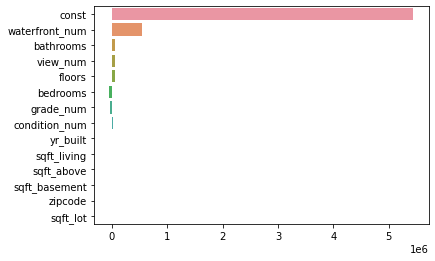

In [33]:
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h')

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     2506.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:42:54   Log-Likelihood:            -2.5810e+05
No. Observations:               18749   AIC:                         5.162e+05
Df Residuals:                   18736   BIC:                         5.163e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.441e+06   1.58e+05     34.353      0.000    5.13e+06    5.75e+06
bedrooms       -4.966e+04   2322.969    -21.376      0.000   -5.42e+04   -4.51e+04
bathrooms       6.531e+04   3963.845     16.475      0.000    5.75e+04    7.31e+04
sqft_living      167.9354      2.337     71.859      0.000     163.355     172.516
sqft_lot          -0.3823      0.042     -9.011      0.000      -0.465      -0.299
floors           5.52e+04   4371.622     12.627      0.000    4.66e+04    6.38e+04
sqft_above        95.7022      2.380     40.210      0.000      91.037     100.367
sqft_basement     72.2332      3.199     22.579      0.000      65.963      78.504
yr_built       -2748.6468     79.893    -34.404      0.000   -2905.244   -2592.050
zipcode           21.7457     97.189      0.224      0.823    -168.753     212.244
waterfront_num  5.505e+05   2.13e+04     25.798      0.000    5.09e+05    5.92e+05
view_num        5.915e+04   2577.193     22.951      0.000    5.41e+04    6.42e+04
condition_num   2.118e+04   2844.220      7.448      0.000    1.56e+04    2.68e+04
grade_num      -2.328e+04    949.506    -24.521      0.000   -2.51e+04   -2.14e+04
==============================================================================
Omnibus:                    11247.158   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           423081.699
Skew:                           2.294   Prob(JB):                         0.00
Kurtosis:                      25.815   Cond. No.                     1.83e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
# sns.pairplot(df2)

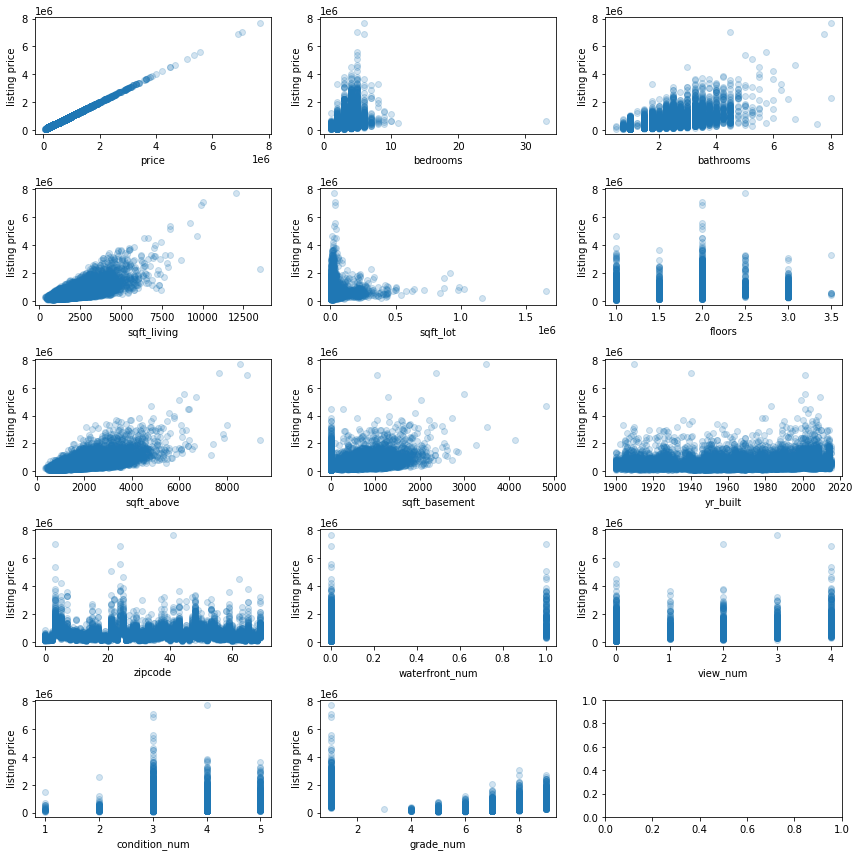

In [36]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(12, 12))
fig.set_tight_layout(True)

for index, col in enumerate(df2.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df2[col], df2['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [37]:
# return residuals from model
residuals = model.resid

# view residuals
residuals

1       -215439.439473
2        -91961.121086
3         74416.213628
4        176281.603964
5       -255871.763339
             ...      
21591    208871.610320
21592    -19518.257493
21593    -65158.581812
21594    253296.251963
21596    173341.863820
Length: 18749, dtype: float64

In [38]:
# return predicted values from model
y_pred = model.fittedvalues

# view predicted values
y_pred

1        7.534394e+05
2        2.719611e+05
3        5.295838e+05
4        3.337184e+05
5        1.485872e+06
             ...     
21591    2.661284e+05
21592    3.795183e+05
21593    4.651586e+05
21594    1.488047e+05
21596    1.516581e+05
Length: 18749, dtype: float64

C:\Users\tfuge\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tfuge\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


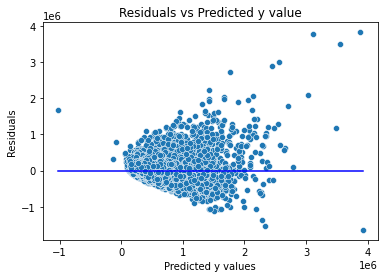

In [39]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

C:\Users\tfuge\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


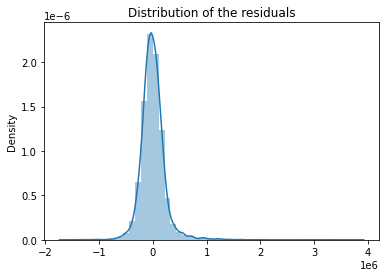

In [40]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

In [41]:
from scipy import stats

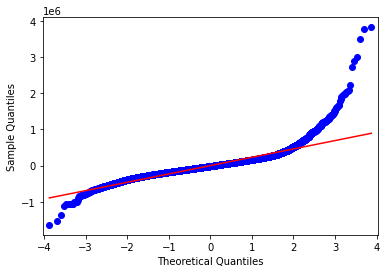

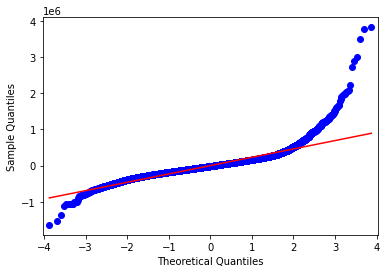

In [42]:
sm.qqplot(residuals, line ='s')

From just looking at the residuals plot, we definitely need to take out some of the higher residuals as they are throwing the data out of whack.

In [43]:
df3 = df2

In [44]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,waterfront_num,view_num,condition_num,grade_num
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,55,0.0,0.0,3.0,7.0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,16,0.0,0.0,3.0,6.0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,58,0.0,0.0,5.0,7.0
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,37,0.0,0.0,3.0,8.0
5,1230000.0,4,4.50,5420,101930,1.0,3890,1530.0,2001,29,0.0,0.0,3.0,1.0


In [45]:
df3.reset_index(inplace=True)

In [46]:
# IQR
Q1 = np.percentile(df3['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df3['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df3.shape)
 
# Upper bound
upper = np.where(df3['price'] >= (Q3+IQR))
# Lower bound
lower = np.where(df3['price'] <= (Q1-1.5*IQR))  

''' Removing the Outliers '''
df3.drop(labels=upper[0], inplace = True)
df3.drop(lower[0], inplace = True)
 
print("New Shape: ", df3.shape)
print(upper)

Old Shape:  (18749, 15)
New Shape:  (17291, 15)
(array([    4,    16,    41, ..., 18736, 18740, 18743], dtype=int64),)


C:\Users\tfuge\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

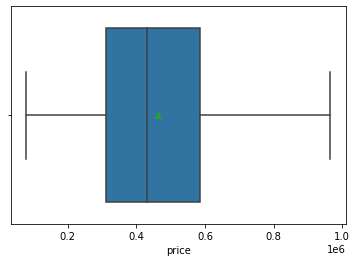

In [47]:
# check charges variable for outliers
sns.boxplot(df3["price"], showmeans=True)

Looks like we got all of the outliers out of the data without losing too much data. Lets test the data again

In [48]:
# create predictors
predictors2 = df3.drop(['price'], axis=1)

# create model intercept
predictors_int2 = sm.add_constant(predictors2)

# fit model to data
model2 = sm.OLS(df3['price'],predictors_int2).fit()

In [49]:
# return residuals from model
residuals2 = model2.resid

Looks like there is still one value in the upper residuals that would throw everything off. Lets remove that one value

In [50]:
residuals2.drop(labels=residuals2.idxmax(), inplace=True)

C:\Users\tfuge\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

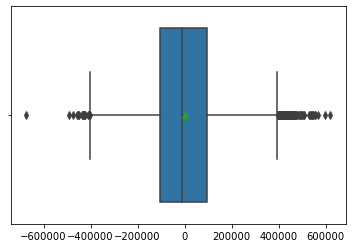

In [51]:
# view boxplot of residuals
sns.boxplot(residuals2, showmeans=True)

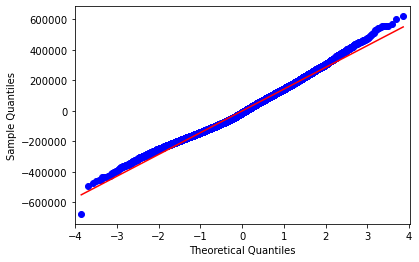

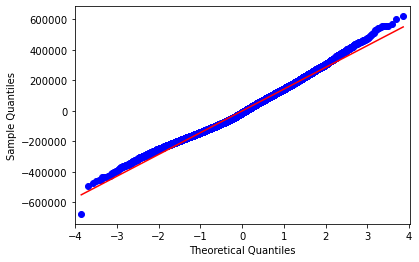

In [52]:
sm.qqplot(residuals2, line ='s')

Looks much better. 

In [53]:
df3.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,waterfront_num,view_num,condition_num,grade_num
0,1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,55,0.0,0.0,3.0,7.0
1,2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,16,0.0,0.0,3.0,6.0
2,3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,58,0.0,0.0,5.0,7.0
3,4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,37,0.0,0.0,3.0,8.0
5,8,229500.0,3,1.00,1780,7470,1.0,1050,730.0,1960,60,0.0,0.0,3.0,7.0


In [54]:
df3.drop(labels=['index'], axis=1, inplace=True)

In [55]:
# create predictors
predictors2 = df3.drop(['price'], axis=1)

# create model intercept
predictors_int2 = sm.add_constant(predictors2)

# fit model to data
model2 = sm.OLS(df3['price'],predictors_int2).fit()

In [56]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:55:29   Log-Likelihood:            -2.2976e+05
No. Observations:               17291   AIC:                         4.595e+05
Df Residuals:                   17278   BIC:                         4.597e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.32e+06   1.06e+05     31.417      0.000    3.11e+06    3.53e+06
bedrooms       -2.528e+04   1528.577    -16.541      0.000   -2.83e+04   -2.23e+04
bathrooms       3.287e+04   2668.042     12.320      0.000    2.76e+04    3.81e+04
sqft_living      102.6645      1.675     61.275      0.000      99.380     105.949
sqft_lot           0.0381      0.029      1.327      0.185      -0.018       0.094
floors           5.25e+04   2874.108     18.268      0.000    4.69e+04    5.81e+04
sqft_above        61.0674      1.648     37.063      0.000      57.838      64.297
sqft_basement     41.5970      2.238     18.585      0.000      37.210      45.984
yr_built       -1698.4384     53.593    -31.691      0.000   -1803.486   -1593.391
zipcode          589.7190     63.080      9.349      0.000     466.075     713.363
waterfront_num  3.961e+04   2.26e+04      1.753      0.080   -4686.704    8.39e+04
view_num        2.692e+04   1953.100     13.786      0.000    2.31e+04    3.08e+04
condition_num   1.618e+04   1847.249      8.759      0.000    1.26e+04    1.98e+04
grade_num       4958.7516    757.822      6.543      0.000    3473.343    6444.160
==============================================================================
Omnibus:                      382.595   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.154
Skew:                           0.365   Prob(JB):                     1.42e-89
Kurtosis:                       3.186   Cond. No.                     8.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
# create non normal variables list
non_normal = ['price']

# use for loop to apply log transform on variable
for feat in non_normal:
    df3[feat] = df3[feat].map(lambda x: np.log(x))

In [58]:
# sns.pairplot(df3)

Some of the charts above definitely look better after that.

In [59]:
# create predictors
predictors3 = df3.drop(['price'], axis=1)

# create model intercept
predictors_int3 = sm.add_constant(predictors3)

# fit model to data
model3 = sm.OLS(df3['price'],predictors_int3).fit()

In [60]:
# view model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1039.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:55:31   Log-Likelihood:                -5149.0
No. Observations:               17291   AIC:                         1.032e+04
Df Residuals:                   17278   BIC:                         1.042e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.5043      0.241     76.702      0.000      18.031      18.977
bedrooms          -0.0529      0.003    -15.156      0.000      -0.060      -0.046
bathrooms          0.0869      0.006     14.275      0.000       0.075       0.099
sqft_living        0.0002   3.82e-06     57.274      0.000       0.000       0.000
sqft_lot        1.613e-07   6.55e-08      2.463      0.014    3.29e-08     2.9e-07
floors             0.1240      0.007     18.895      0.000       0.111       0.137
sqft_above         0.0001   3.76e-06     31.653      0.000       0.000       0.000
sqft_basement      0.0001   5.11e-06     19.573      0.000       9e-05       0.000
yr_built          -0.0034      0.000    -28.096      0.000      -0.004      -0.003
zipcode            0.0019      0.000     12.869      0.000       0.002       0.002
waterfront_num     0.1013      0.052      1.965      0.049       0.000       0.202
view_num           0.0489      0.004     10.965      0.000       0.040       0.058
condition_num      0.0393      0.004      9.323      0.000       0.031       0.048
grade_num          0.0254      0.002     14.670      0.000       0.022       0.029
==============================================================================
Omnibus:                       93.502   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.829
Skew:                          -0.179   Prob(JB):                     2.56e-21
Kurtosis:                       2.945   Cond. No.                     8.82e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R squared value did not increase though. Maybe we will try to apply min max scaling to the values.

In [61]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'waterfront_num',
       'view_num', 'condition_num', 'grade_num'],
      dtype='object')

In [62]:
# import preprocessing module from sklearn
from sklearn import preprocessing

# Use min max scaling on dataset
minmax_scale = preprocessing.MinMaxScaler().fit(df3[['yr_built', 'zipcode', 'sqft_basement']])
#df_minmax = pd.DataFrame(minmax_scale.transform(insurance_df[['age', 'bmi', 'children']]))
df_minmax = minmax_scale.transform(df3[['yr_built', 'zipcode', 'sqft_basement']])

In [63]:
df_minmax

array([[0.44347826, 0.79710145, 0.14705882],
       [0.28695652, 0.23188406, 0.        ],
       [0.56521739, 0.84057971, 0.33455882],
       ...,
       [0.99130435, 0.86956522, 0.        ],
       [0.94782609, 0.85507246, 0.        ],
       [0.93913043, 0.85507246, 0.        ]])

In [64]:
df_minmax.shape

(17291, 3)

In [65]:
# create a copy of insurance dataframe
df4 = df3.copy()

# drop old columns
df4 = df4.drop(['yr_built', 'zipcode', 'sqft_basement'], axis= 1)

In [66]:
# create new DataFrame with minmax variables
# add NumPy matrix as new columns in DataFrame
df4 = pd.concat([df4, pd.DataFrame(df_minmax)], axis=1)

In [67]:
df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,waterfront_num,view_num,condition_num,grade_num,0,1,2
0,13.195614,3.0,2.25,2570.0,7242.0,2.0,2170.0,0.0,0.0,3.0,7.0,0.443478,0.797101,0.147059
1,12.100712,2.0,1.00,770.0,10000.0,1.0,770.0,0.0,0.0,3.0,6.0,0.286957,0.231884,0.000000
2,13.311329,4.0,3.00,1960.0,5000.0,1.0,1050.0,0.0,0.0,5.0,7.0,0.565217,0.840580,0.334559
3,13.142166,3.0,2.00,1680.0,8080.0,1.0,1680.0,0.0,0.0,3.0,8.0,0.756522,0.536232,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.521739,0.869565,0.268382


In [68]:
df4 = df4.dropna()

In [69]:
# create predictors
predictors4 = df4.drop(['price'], axis=1)

# create model intercept
predictors_int4 = sm.add_constant(predictors4)

# fit model to data
model4 = sm.OLS(df4['price'], predictors_int4).fit()

In [70]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     726.5
Date:                Fri, 02 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:55:40   Log-Likelihood:                -5548.9
No. Observations:               15983   AIC:                         1.113e+04
Df Residuals:                   15969   BIC:                         1.123e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.9105      0.025    470.313      0.000      11.861      11.960
bedrooms          -0.0414      0.004    -11.068      0.000      -0.049      -0.034
bathrooms          0.0097      0.006      1.555      0.120      -0.003       0.022
sqft_living        0.0004   8.73e-06     40.723      0.000       0.000       0.000
sqft_lot       -1.292e-08   6.99e-08     -0.185      0.853    -1.5e-07    1.24e-07
floors             0.0984      0.007     13.273      0.000       0.084       0.113
sqft_above     -3.193e-05   8.72e-06     -3.662      0.000    -4.9e-05   -1.48e-05
waterfront_num     0.1078      0.054      1.986      0.047       0.001       0.214
view_num           0.0688      0.005     14.537      0.000       0.060       0.078
condition_num      0.0658      0.004     15.376      0.000       0.057       0.074
grade_num          0.0198      0.002     10.429      0.000       0.016       0.024
0                 -0.0038      0.011     -0.335      0.738      -0.026       0.019
1                  0.0124      0.010      1.201      0.230      -0.008       0.033
2                  0.0218      0.019      1.173      0.241      -0.015       0.058
==============================================================================
Omnibus:                      197.890   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.934
Skew:                          -0.128   Prob(JB):                     9.17e-32
Kurtosis:                       2.614   Cond. No.                     8.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Out of all the 4 models we produced, it looks like the first model provided the best R squared value which accounts for the most amount of variance in the model (around 62%). We will use this model going forward with our test and train data.

In [176]:
df10 = df2

In [177]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,waterfront_num,view_num,condition_num,grade_num
0,13.195614,3,2.25,2570,7242,2.0,2170,400.0,1951,55,0.0,0.0,3.0,7.0
1,12.100712,2,1.00,770,10000,1.0,770,0.0,1933,16,0.0,0.0,3.0,6.0
2,13.311329,4,3.00,1960,5000,1.0,1050,910.0,1965,58,0.0,0.0,5.0,7.0
3,13.142166,3,2.00,1680,8080,1.0,1680,0.0,1987,37,0.0,0.0,3.0,8.0
5,12.343658,3,1.00,1780,7470,1.0,1050,730.0,1960,60,0.0,0.0,3.0,7.0


Lets break up the data into the test and train datasets to take a look at the scatterplots for each category as they relate to price.

In [178]:
train = df10
test = df10

X_train = train.drop("price", axis=1)
y_train = train["price"]

X_test = test.drop("price", axis=1)
y_test = test["price"]

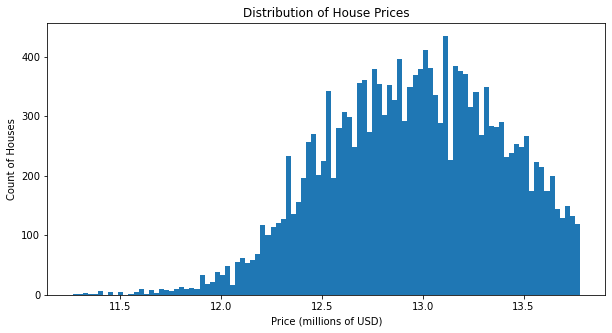

In [179]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel("Price (millions of USD)")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices");

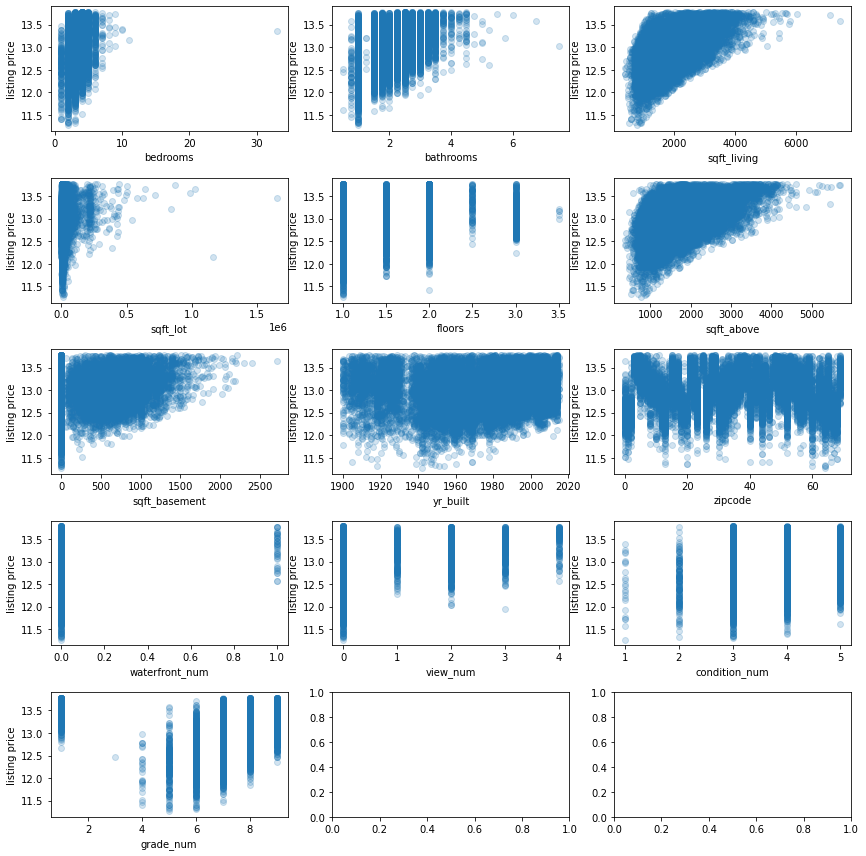

In [180]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(12, 12))
fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

Now that our data looks good, and nothing looks off in the scatter plots, we will create a heatmap of correlation between the values

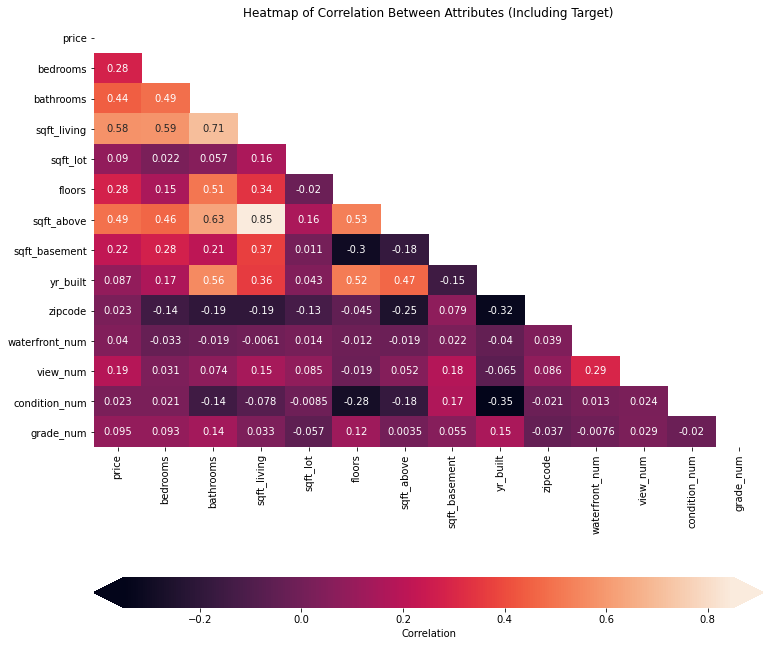

In [181]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Nothing correlates well with the target but given the amount of variables that factor into this, that is to be expected.

Now we will want to create a baseline model to compare our results to as we work through this problem. We will use sqft_living to create the baseline model to compare to.

In [182]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [183]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.33745426017203567
Validation score: 0.33388483747127734


Well our current baseline model really is not great. The R squared scores are less than desirable at 0.34 and 0.32 each. Maybe that will change when we run all of the variables together.

In [184]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4203277474745926
Validation score: 0.4147000405771138

Baseline Model
Train score:      0.33745426017203567
Validation score: 0.33388483747127734


Definitely better but not nearly as good as what was predicted from statsmodel. So maybe we

In [185]:
poly_3 = PolynomialFeatures(3)
X_poly3 = poly_3.fit_transform(X_train)

In [186]:
model_poly3 = LinearRegression()
scores_complex3 = cross_validate(
                        model_poly3, X_poly3, y_train, cv=5, 
                        return_train_score=True
)
scores_complex3

{'fit_time': array([0.94753456, 0.95084429, 0.95837212, 0.95428348, 0.94524693]),
 'score_time': array([0.01603556, 0.01804113, 0.01720262, 0.01565886, 0.01564384]),
 'test_score': array([-0.4400799 ,  0.48300987,  0.48717601,  0.52064103,  0.32081384]),
 'train_score': array([0.57700669, 0.57667563, 0.57540889, 0.57769349, 0.56466744])}

In [187]:
# Mean train r_2
np.mean(scores_complex3['train_score']), np.std(scores_complex3['train_score'])

(0.574290427651296, 0.004868286448142374)

In [188]:
np.mean(scores_complex3['test_score']), np.std(scores_complex3['test_score'])

(0.27431217058327284, 0.36388517223912914)

In [189]:
# Fit on all the training data
model_poly3.fit(X_poly3, y_train)
model_poly3.score(X_poly3, y_train)

0.5713007602478044

This model appears to have come with a R squared score of 0.587. Its not ideal but it seems to be a good score in the overall scheme of things, but our test score is terrible at 0.08. We definitely overfit the data, maybe we can come back and tweak the model to be less complex.

In [190]:
# Test out our polynomial model
poly_2 = PolynomialFeatures(2)
X_poly2 = poly_2.fit_transform(X_train)

In [191]:
model_poly2 = LinearRegression()
scores_complex2 = cross_validate(
                        model_poly2, X_poly2, y_train, cv=5, 
                        return_train_score=True
)
scores_complex2

{'fit_time': array([0.07765055, 0.10998964, 0.09413218, 0.08936572, 0.09782243]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.54773469, 0.52968817, 0.54382284, 0.53643555, 0.5532435 ]),
 'train_score': array([0.55209172, 0.55629694, 0.55320235, 0.55339167, 0.54734907])}

In [192]:
# Mean train r_2
np.mean(scores_complex2['train_score']), np.std(scores_complex2['train_score']) 

(0.5524663482997803, 0.002911984295403738)

In [193]:
# Mean test r_2
np.mean(scores_complex2['test_score']), np.std(scores_complex2['test_score'])

(0.542184950936001, 0.008306611557813454)

In [194]:
model_poly2.fit(X_poly2, y_train)
model_poly2.score(X_poly2, y_train)

0.5518075602672257

This final model has given us the most consistent numbers so far as far as a R2 score. We can account for more than half the variance in the data using this model. The scores are a little bit worse than the 